<a href="https://www.kaggle.com/code/pranotoshmandal2/eda-on-titanic-dataset?scriptVersionId=257883087" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [2]:
df=pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Shape of the data that has 891 rows and 12 columns

In [4]:
df.shape

(891, 12)

# Name of columns

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Check infoabout datatype, null 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Count the null values

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# The age,cabin and embarked columns has null values. So, age replaced by median and embarked replaced by mode and dropped the column for excessive missing values

In [8]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipykernel_14/1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [9]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

/tmp/ipykernel_14/3717664479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [10]:
df.drop(columns=['Cabin'],inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Hare how may passanges has survived or not

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

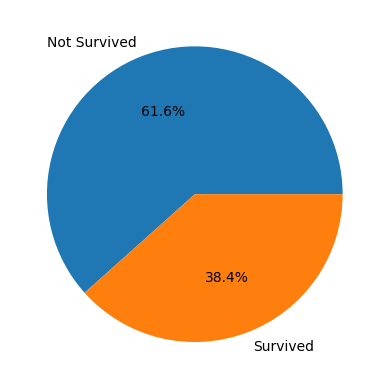

In [14]:
plt.pie(df['Survived'].value_counts(),labels=['Not Survived','Survived'],autopct='%1.1f%%')

plt.show()

# Classwise number passengers 

In [15]:
num_class=df['Pclass'].value_counts()
num_class

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

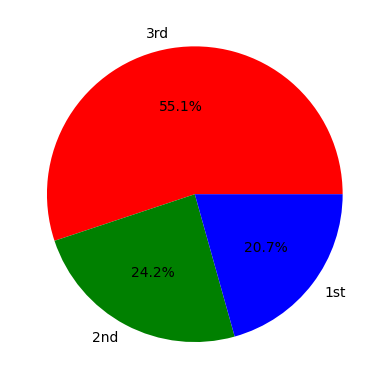

In [16]:
plt.pie(num_class, colors=['red','green','blue'],labels=['3rd','2nd','1st'],autopct='%1.1f%%')
plt.show()

# Number of Female and Male passengers

In [17]:
gender=df['Sex'].value_counts()
gender

Sex
male      577
female    314
Name: count, dtype: int64

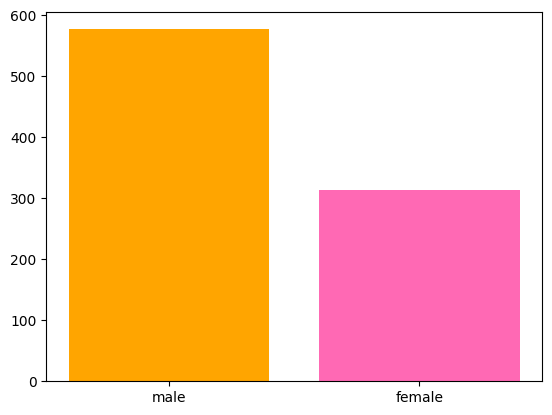

In [18]:
plt.bar(gender.index,gender.values,color=['orange','hotpink'])
plt.show()

# How many passenges emberked from C = Cherbourg, Q = Queenstown, S = Southampton

In [19]:
emberked=df['Embarked'].value_counts()
emberked

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

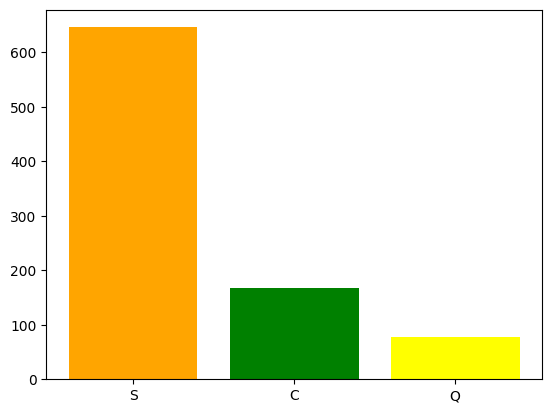

In [20]:
plt.bar(emberked.index,emberked.values,color=['orange','green','yellow'])
plt.show()

# Analyzing Survival Rates


In [21]:
survival_rate=df['Survived'].mean()
print(f"Overall Survival Rate: {survival_rate: .2%}")

Overall Survival Rate:  38.38%


In [22]:
# survival rate by sex
gender_rate=df.groupby('Sex')['Survived'].mean()
print(gender_rate)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [23]:
# survival rate by passangers class
class_survival=df.groupby('Pclass')['Survived'].mean()
print(class_survival)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


# Survival by gender and class

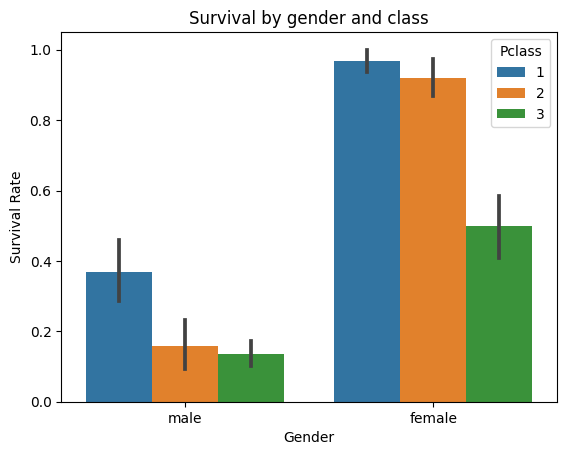

In [24]:
sns.barplot(x='Sex',y='Survived',hue='Pclass',data=df)
plt.title('Survival by gender and class')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

# Age distribution

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


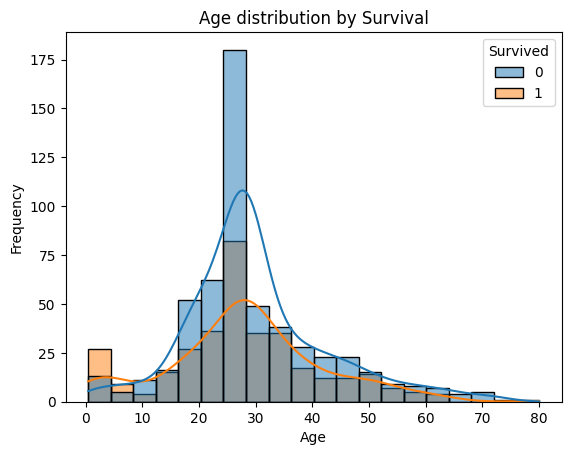

In [25]:
sns.histplot(data=df,x='Age',hue='Survived',kde=True,bins=20)
plt.title("Age distribution by Survival")
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.show()

# Fare distribution by survival

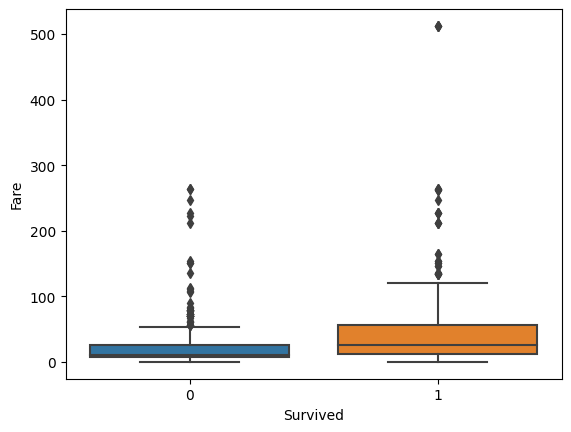

In [26]:
sns.boxplot(x='Survived',y='Fare',data=df)
plt.show()

In [27]:
fare=df['Fare']
Q1=fare.quantile(0.25) #q1 = np.percentile(fare, 25, interpolation = 'midpoint')
Q3=fare.quantile(0.75)
IQR=Q3-Q1


In [28]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -26.724
up_limit is 65.6344


In [29]:
outlier =[]
for x in fare:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

 outlier in the dataset is [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


# Coreelation Analysis

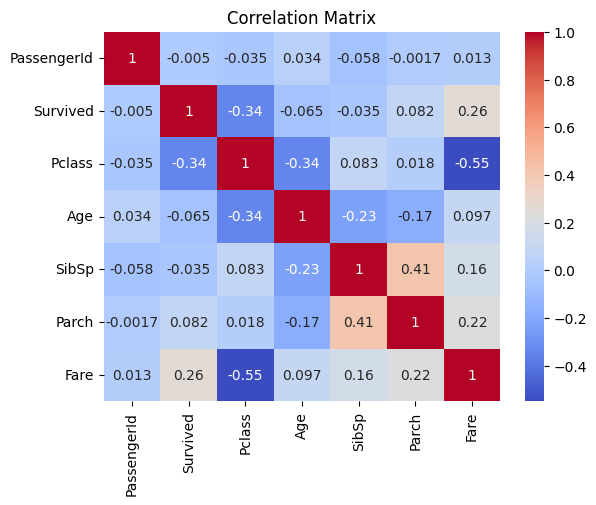

In [30]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# How many male and female passengers survived, grouped by embarked port (S, C, Q).

In [31]:
survival_counts = df.groupby(["Embarked", "Sex", "Survived"]).size().reset_index(name="count")

print(survival_counts)

   Embarked     Sex  Survived  count
0         C  female         0      9
1         C  female         1     64
2         C    male         0     66
3         C    male         1     29
4         Q  female         0      9
5         Q  female         1     27
6         Q    male         0     38
7         Q    male         1      3
8         S  female         0     63
9         S  female         1    142
10        S    male         0    364
11        S    male         1     77


In [32]:
# Pivot for better readability
pivot_table = survival_counts.pivot_table(index=["Embarked"], columns=["Sex", "Survived"], values="count", fill_value=0)
print("\nPivot Table:\n", pivot_table)


Pivot Table:
 Sex      female          male      
Survived      0      1      0     1
Embarked                           
C           9.0   64.0   66.0  29.0
Q           9.0   27.0   38.0   3.0
S          63.0  142.0  364.0  77.0
